## Investigate Peninsula supercooling

In CESM2_tune0_ens1011_monthly experiment (also in CESM2_tune0_ens1011).

In [1]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')

In [2]:
base_dir     = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
ens1011_dir1 = f'{base_dir}output/CESM2_tune0_ens1011_branch1/files0/'
ens1011_dir2 = f'{base_dir}output/CESM2_tune0_ens1011_branch2/files0/'
ens1011_dir3 = f'{base_dir}output/CESM2_tune0_ens1011_branch3/files0/'
ens1011_dir4 = f'{base_dir}output/CESM2_tune0_ens1011_branch4/files0/'
ens1011_dir0 = f'{base_dir}output/CESM2_tune0_ens1011_monthly/files0/'
cesm2_1900 = f'{base_dir}output/CESM2_t0_ens1011_monthly_highresbias_1900/files0/'
lowres_dir0  = f'{base_dir}output/test_bias_corr2/files0/'
highres_dir0 = f'{base_dir}output/test_bias_corr5/files0/'
era5_ref_dir = f'{base_dir}output/ERA5_test6/files/'
forcing = f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/ens1011/'
era5 = f'{base_dir}ERA5-forcing/daily/files/'

cesm2_1920 = f'{base_dir}output/CESM2_t0_ens1011_monthly_highresbias_1920/files0/'
cesm2_1920_noicb = f'{base_dir}output/CESM2_t0_ens1011_monthly_highresbias_1920_noicb/files0/'
cesm2_1920_snow  = f'{base_dir}output/CESM2_t0_ens1011_monthly_highresbias_1920_seaice/files0/'
cesm2_1920_low   = f'{base_dir}output/CESM2_t0_ens1011_monthly_lowresbias_1920/files0/'
cesm2_1920_noprec= f'{base_dir}output/CESM2_t0_ens1011_monthly_noprecbias_1920/files0/'

test = f'{base_dir}output/CESM2_hist10/files0/'

In [3]:
# year  = 1941 
# year0 = 1850
# # cesm2T = xr.open_dataset(f'{ens1011_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
# # cesm2S = xr.open_dataset(f'{ens1011_dir}eANT025.L121_1m_{year}0101_{year}1231_SBC.nc')
# cesm2ni0 = xr.open_dataset(f'{cesm2_1920}eANT025.L121_1m_19560101_19561231_icemod.nc')
# cesm2ns0 = xr.open_dataset(f'{cesm2_1920}eANT025.L121_1m_19560101_19561231_SBC.nc')
# cesm2i0 = xr.open_dataset(f'{ens1011_dir0}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# cesm2T = xr.open_dataset(f'{ens1011_dir0}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
# lresi0  = xr.open_dataset(f'{lowres_dir0}eANT025.L121_1m_{year0}0101_{year0}1231_icemod-v0.nc')
# hresi0  = xr.open_dataset(f'{highres_dir0}eANT025.L121_1m_{year0}0101_{year0}1231_icemod-v0.nc')
# # cesm2i1 = xr.open_dataset(f'{ens1011_dir1}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# # cesm2i2 = xr.open_dataset(f'{ens1011_dir2}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# # cesm2i3 = xr.open_dataset(f'{ens1011_dir3}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# # cesm2i4 = xr.open_dataset(f'{ens1011_dir4}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# era5i  = xr.open_dataset(f'{era5_ref_dir}eANT025.L121_1m_19830101_19831231_icemod.nc')
# # cesm2f = xr.open_dataset(f'{forcing}CESM2-LE2_ens1011.001_FSDS_bias_corr_monthly_y{year}.nc')


cesm1920 = xr.open_dataset(f'{cesm2_1920}eANT025.L121_1m_19300101_19301231_icemod.nc').isel(y=slice(180,370))
cesm1920noicb = xr.open_dataset(f'{cesm2_1920_noicb}eANT025.L121_1m_19300101_19301231_icemod.nc').isel(y=slice(180,370))
cesm1920snow  = xr.open_dataset(f'{cesm2_1920_snow}eANT025.L121_1m_19300101_19301231_icemod.nc').isel(y=slice(180,370))
cesm1920low   = xr.open_dataset(f'{cesm2_1920_low}eANT025.L121_1m_19300101_19301231_icemod.nc').isel(y=slice(180,370))
cesm1920noprec= xr.open_dataset(f'{cesm2_1920_noprec}eANT025.L121_1m_19300101_19301231_icemod.nc').isel(y=slice(180,370))

In [24]:
biasT= xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_PRECT_bias_corr_monthly_old.nc')
biasS= xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_PRECS_bias_corr_monthly_old.nc')

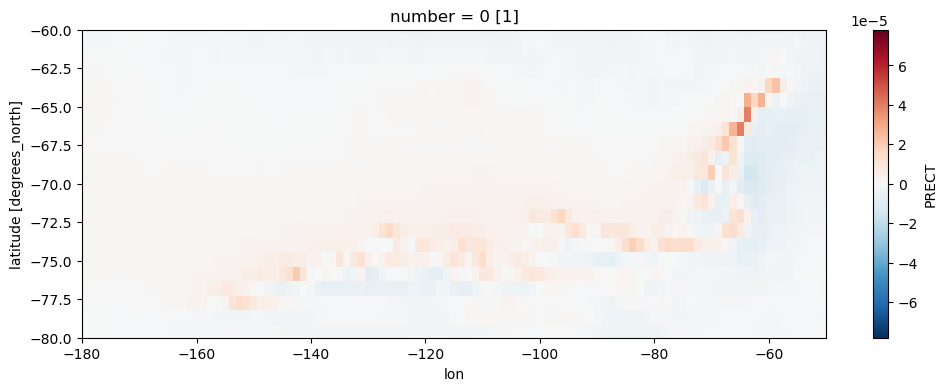

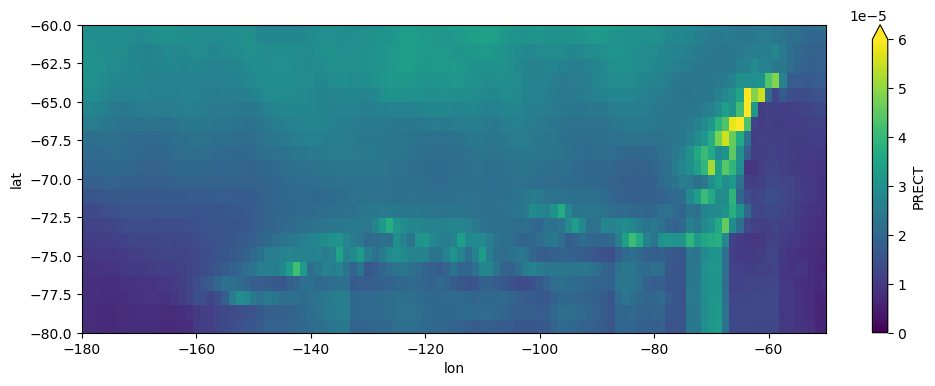

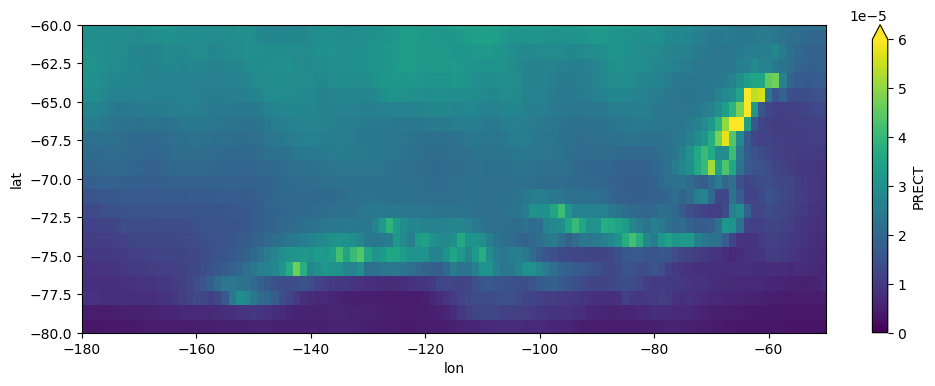

In [32]:
biasT.PRECT.sel(lat=slice(-90,-50)).mean(dim='month').sortby('lon').plot(figsize=(12,4), xlim=(-180,-50), ylim=(-80,-60))
oldT_ds.PRECT.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(figsize=(12,4), xlim=(-180,-50), ylim=(-80,-60), vmin=0, vmax=6e-5)
newT_ds.PRECT.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(figsize=(12,4), xlim=(-180,-50), ylim=(-80,-60), vmin=0, vmax=6e-5)
# biasS.PRECS.sel(lat=slice(-90,-50)).mean(dim='month').sortby('lon').plot(figsize=(12,5))

In [28]:
# check the difference for the new precipitation file:
old_ds   = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_old_y1920.nc')
oldT_ds  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_old_y1920.nc')
new_ds   = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_y1920.nc')
newT_ds  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_y1920.nc')
prev_ds  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_y1920.nc')
prevT_ds = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_y1920.nc')

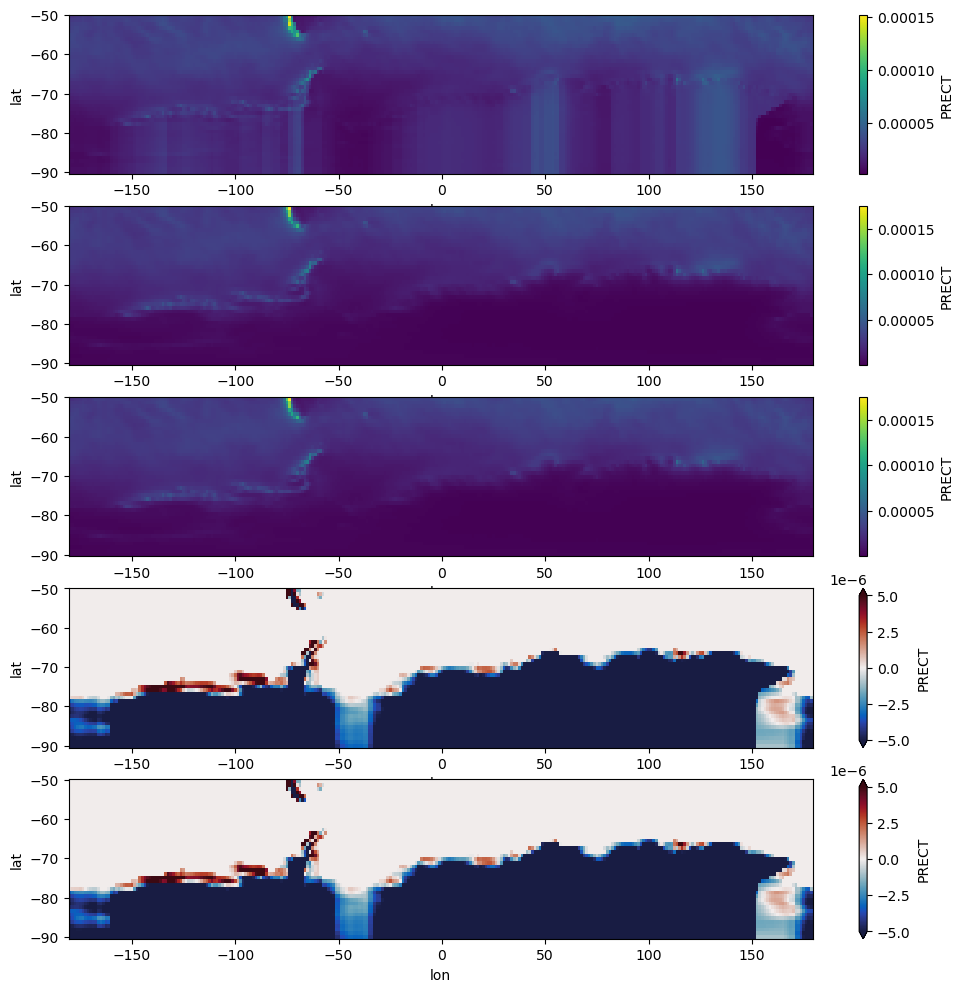

In [22]:
fig, ax = plt.subplots(5,1, figsize=(12, 12))
oldT_ds.PRECT.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[0])
newT_ds.PRECT.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[1])
prevT_ds.PRECT.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[2])
(prevT_ds.PRECT.sel(lat=slice(-90,-50)) - oldT_ds.PRECT.sel(lat=slice(-90,-50))).mean(dim='time').sortby('lon').plot(ax=ax[3], 
                                                                                                                  vmin=-5e-6, vmax=5e-6, cmap=cmocean.cm.balance)
(newT_ds.PRECT.sel(lat=slice(-90,-50)) - oldT_ds.PRECT.sel(lat=slice(-90,-50))).mean(dim='time').sortby('lon').plot(ax=ax[4], 
                                                                                                                  vmin=-5e-6, vmax=5e-6, cmap=cmocean.cm.balance)

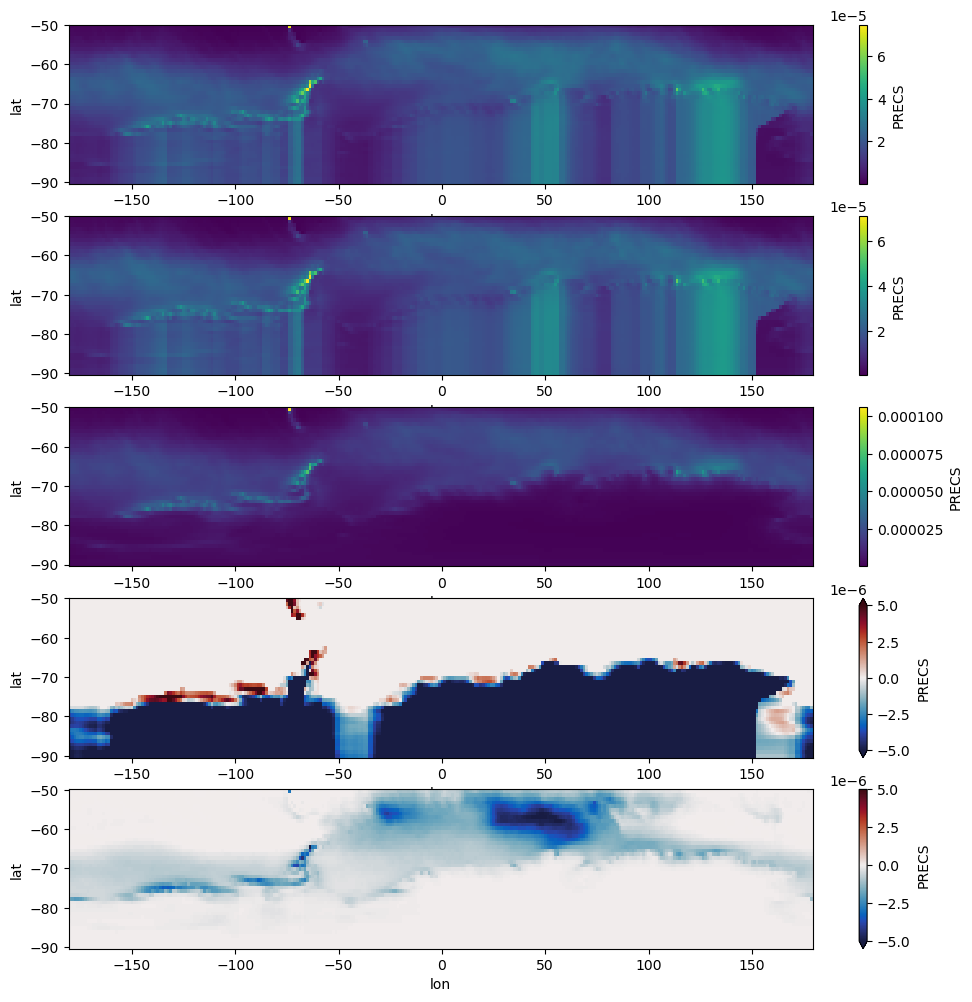

In [15]:
fig, ax = plt.subplots(5,1, figsize=(12, 12))
old_ds.PRECS.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[0])
new_ds.PRECS.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[1])
prev_ds.PRECS.sel(lat=slice(-90,-50)).mean(dim='time').sortby('lon').plot(ax=ax[2])
(prev_ds.PRECS.sel(lat=slice(-90,-50)) - old_ds.PRECS.sel(lat=slice(-90,-50))).mean(dim='time').sortby('lon').plot(ax=ax[3], 
                                                                                                                  vmin=-5e-6, vmax=5e-6, cmap=cmocean.cm.balance)
(new_ds.PRECS.sel(lat=slice(-90,-50)) - old_ds.PRECS.sel(lat=slice(-90,-50))).mean(dim='time').sortby('lon').plot(ax=ax[4], 
                                                                                                                  vmin=-5e-6, vmax=5e-6, cmap=cmocean.cm.balance)

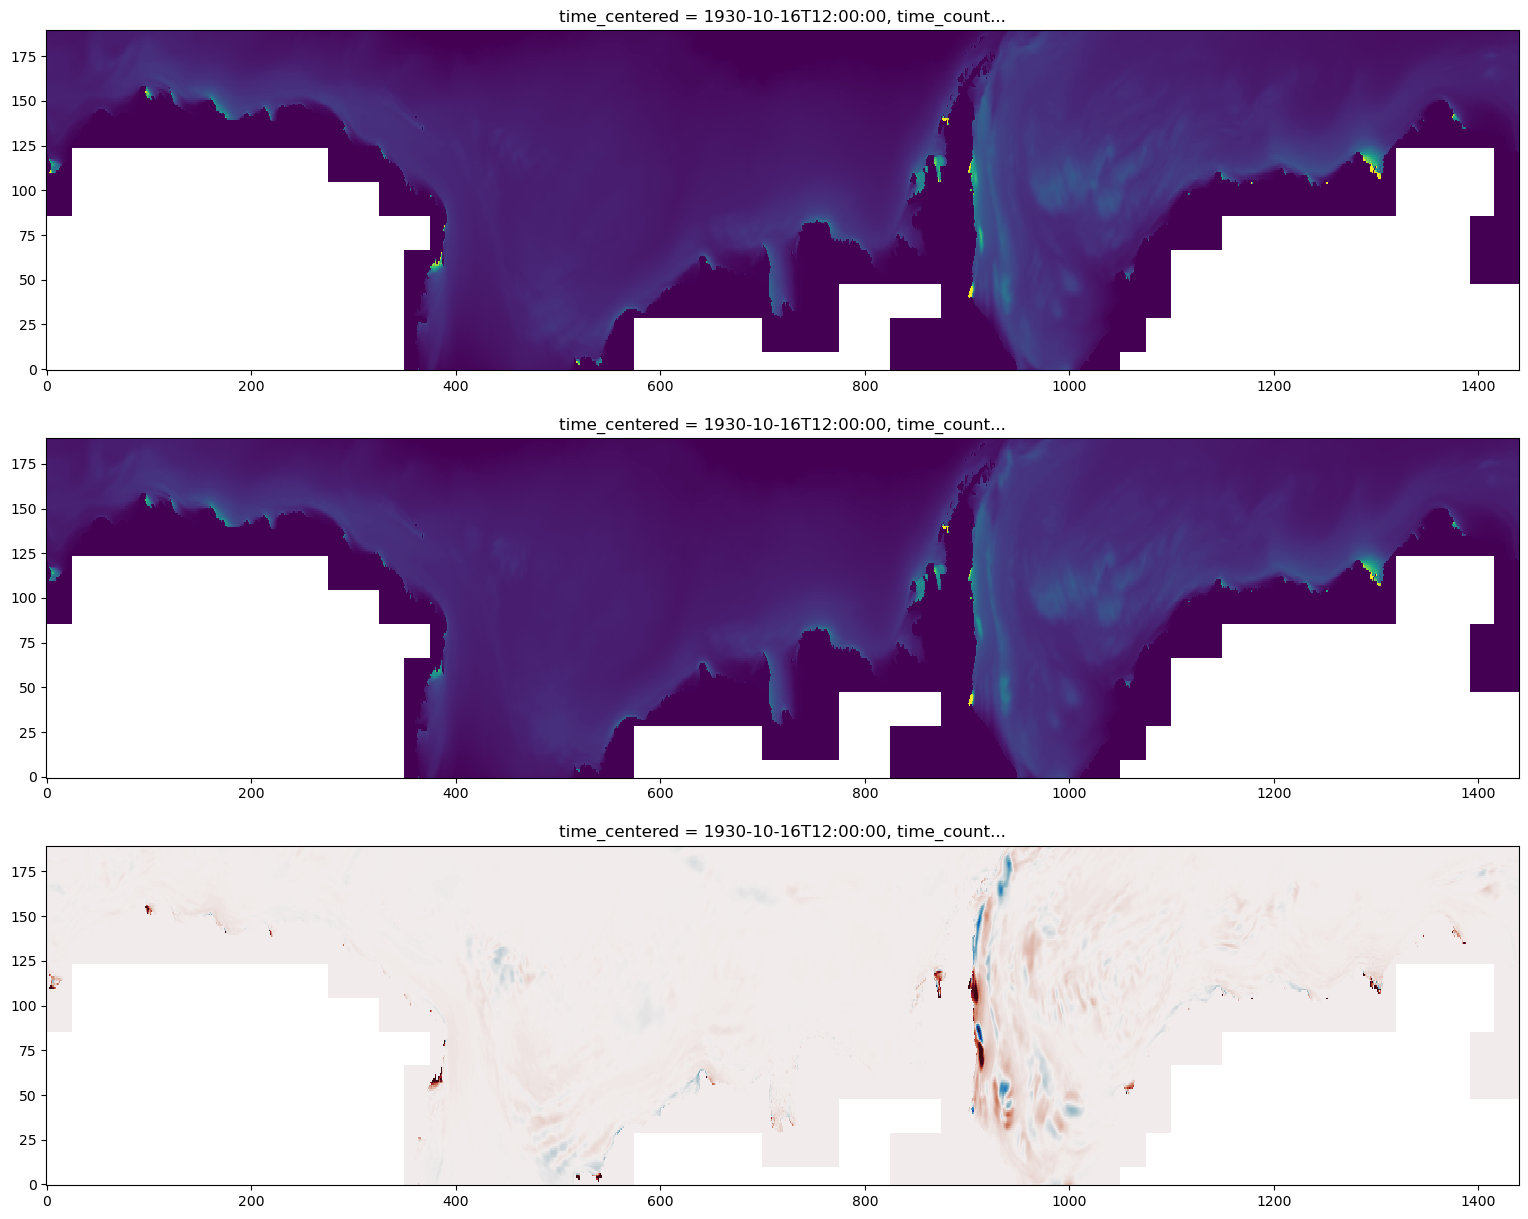

In [9]:
fig, ax = plt.subplots(3,1, figsize=(19,15))
cesm1920.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[0], add_colorbar=False)
cesm1920noicb.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[1], add_colorbar=False)
(cesm1920.sithic.isel(time_counter=9)-cesm1920noicb.sithic.isel(time_counter=9)).plot(vmin=-4, vmax=4, ax=ax[2], cmap=cmocean.cm.balance, add_colorbar=False)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

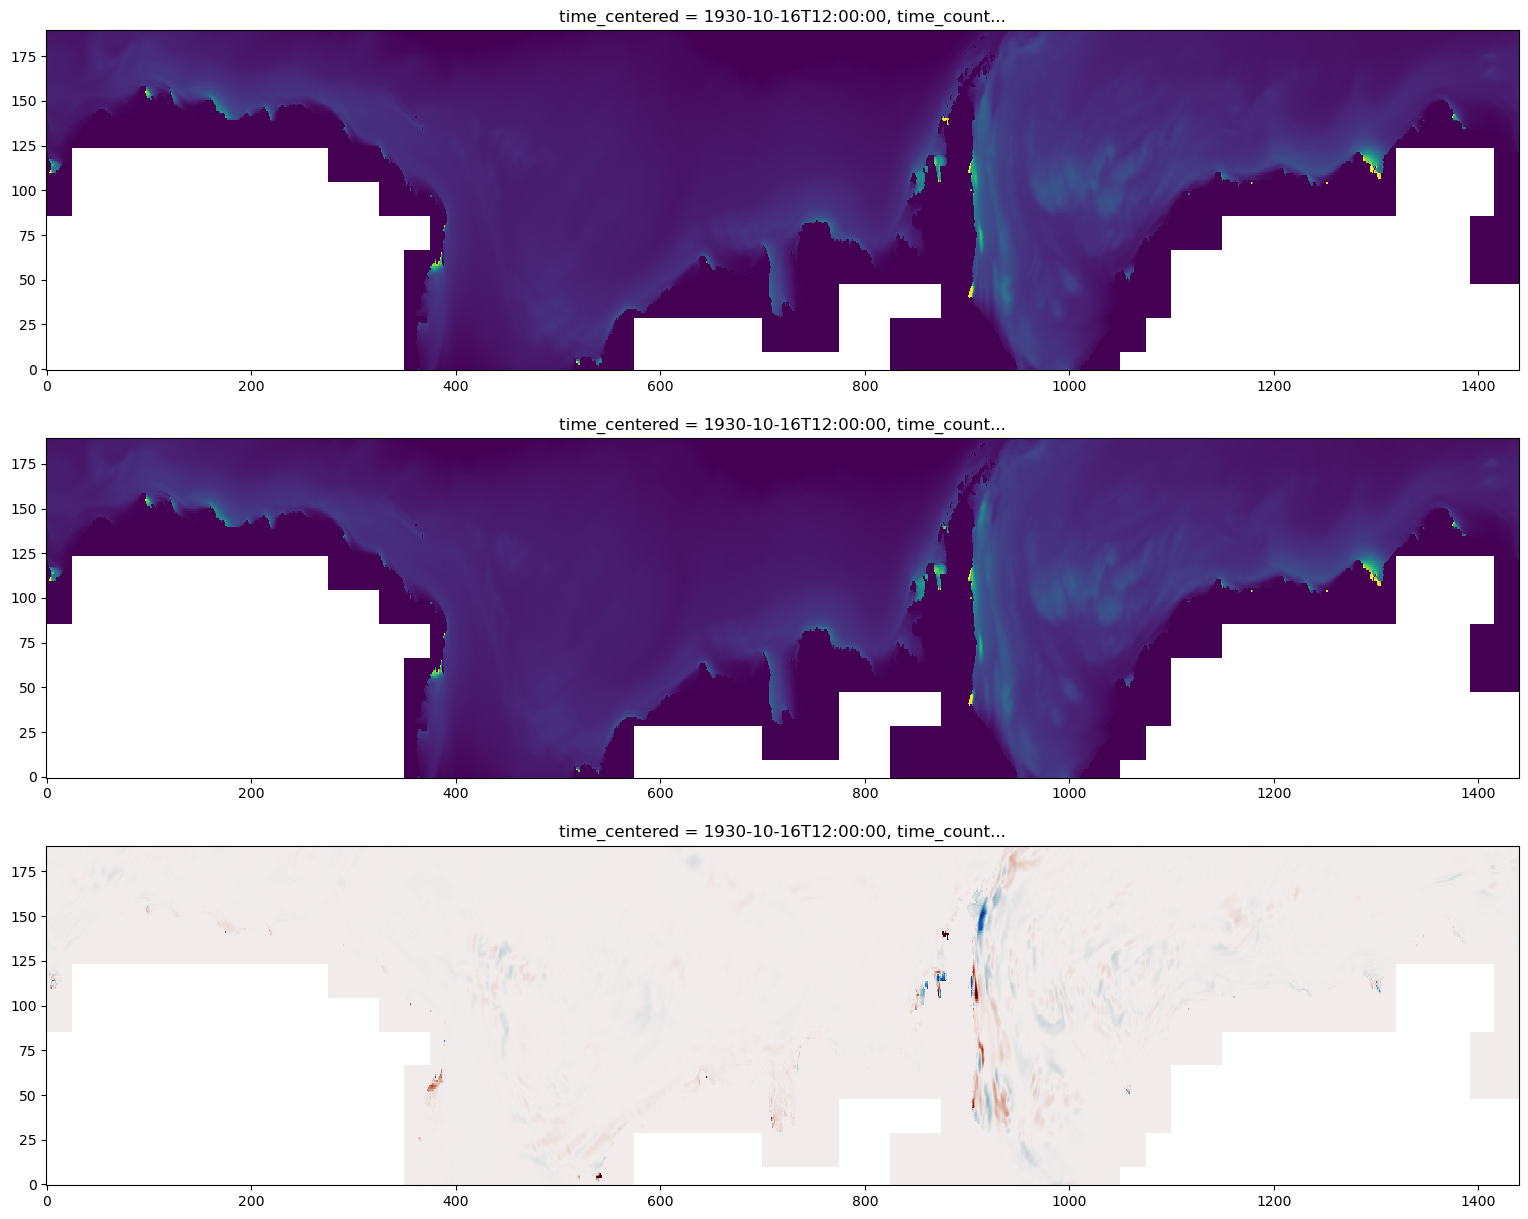

In [54]:
fig, ax = plt.subplots(3,1, figsize=(19,15))
cesm1920.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[0], add_colorbar=False)
cesm1920low.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[1], add_colorbar=False)
(cesm1920.sithic.isel(time_counter=9)-cesm1920low.sithic.isel(time_counter=9)).plot(vmin=-4, vmax=4, ax=ax[2], cmap=cmocean.cm.balance, add_colorbar=False)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

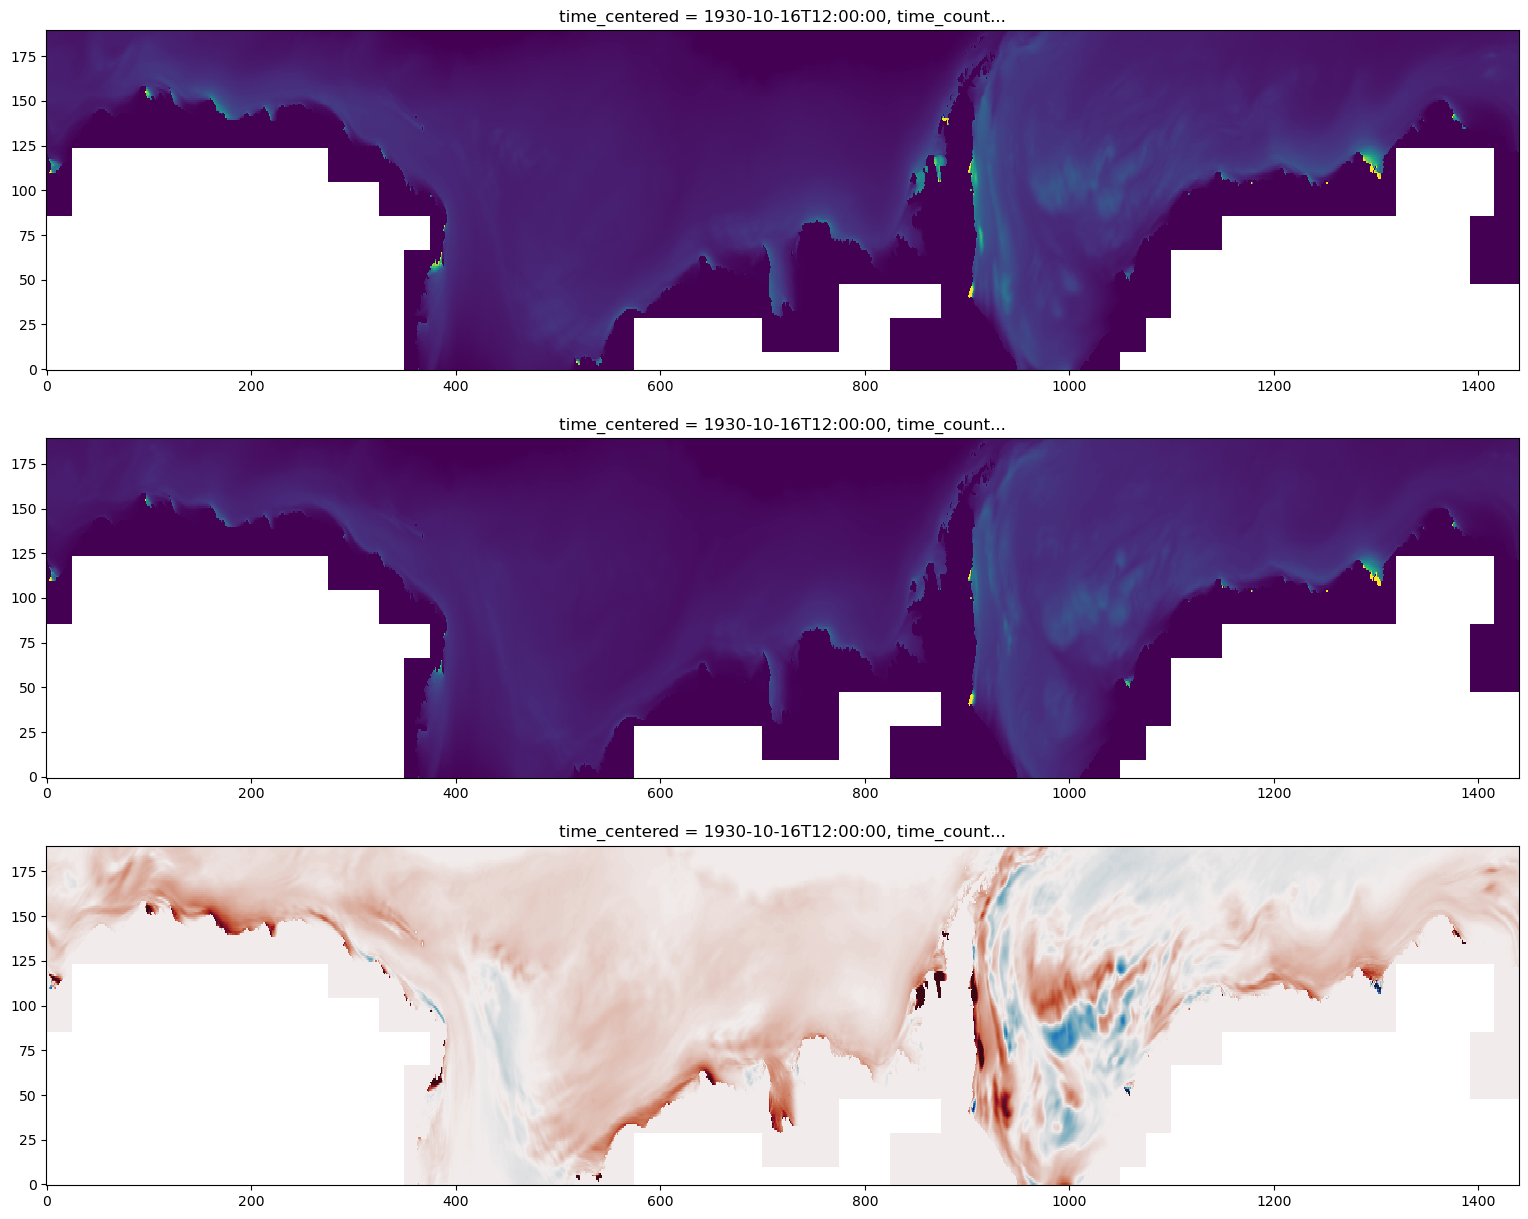

In [10]:
fig, ax = plt.subplots(3,1, figsize=(19,15))
cesm1920.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[0], add_colorbar=False)
cesm1920snow.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[1], add_colorbar=False)
(cesm1920.sithic.isel(time_counter=9)-cesm1920snow.sithic.isel(time_counter=9)).plot(vmin=-4, vmax=4, ax=ax[2], cmap=cmocean.cm.balance, add_colorbar=False)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(19,15))
cesm1920.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[0], add_colorbar=False)
cesm1920noprec.sithic.isel(time_counter=9).plot(vmin=0, vmax=20, ax=ax[1], add_colorbar=False)
(cesm1920.sithic.isel(time_counter=9)-cesm1920noprec.sithic.isel(time_counter=9)).plot(vmin=-4, vmax=4, ax=ax[2], cmap=cmocean.cm.balance, add_colorbar=False)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

### Check if problem regions coincide with areas of iceberg accumulation

In [5]:
# cesm2icb = xr.open_dataset(f'{ens1011_dir0}../restart/eANT025.L121_02127168_restart_icb.nc')
cesm2icb = xr.open_dataset(f'{cesm2_1920}../restart/eANT025.L121_00888320_restart_icb.nc')

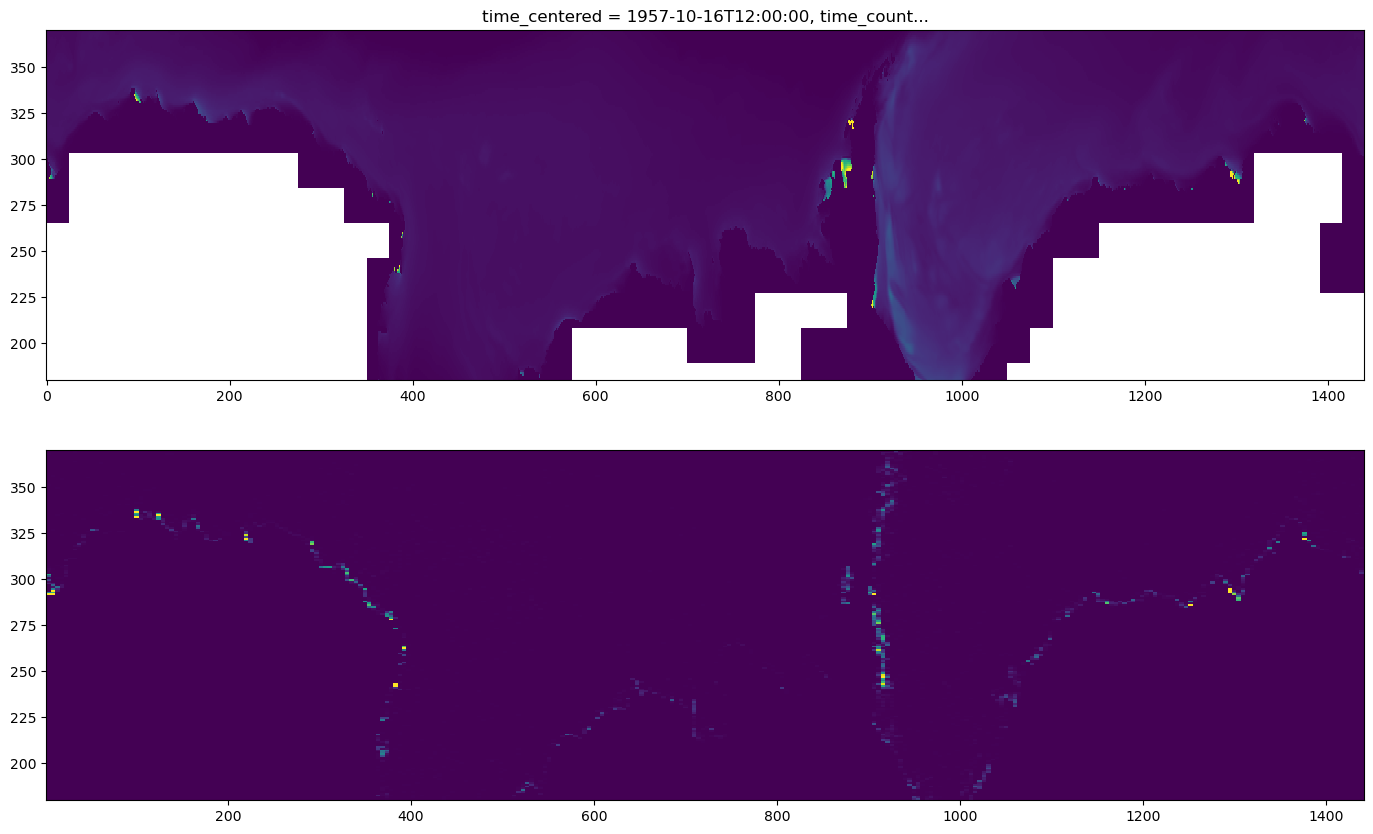

In [17]:
Tvar=cesm2T.sosst.isel(time_counter=0).rename({'x_grid_T':'x','y_grid_T':'y'})
fig, ax = plt.subplots(2,1, figsize=(17,10))
cesm2ni0.sithic.isel(time_counter=9).plot(ylim=(180,370), vmin=0, vmax=40, ax=ax[0], add_colorbar=False)
# cesm2icb.virtual_area.plot(vmin=0, vmax=1e8, ax=ax[1], ylim=(180,370))
cm = ax[1].hist2d(cesm2icb.xi, cesm2icb.yj, bins=300, vmin=0, vmax=200)
ax[1].set_ylim(180,370)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

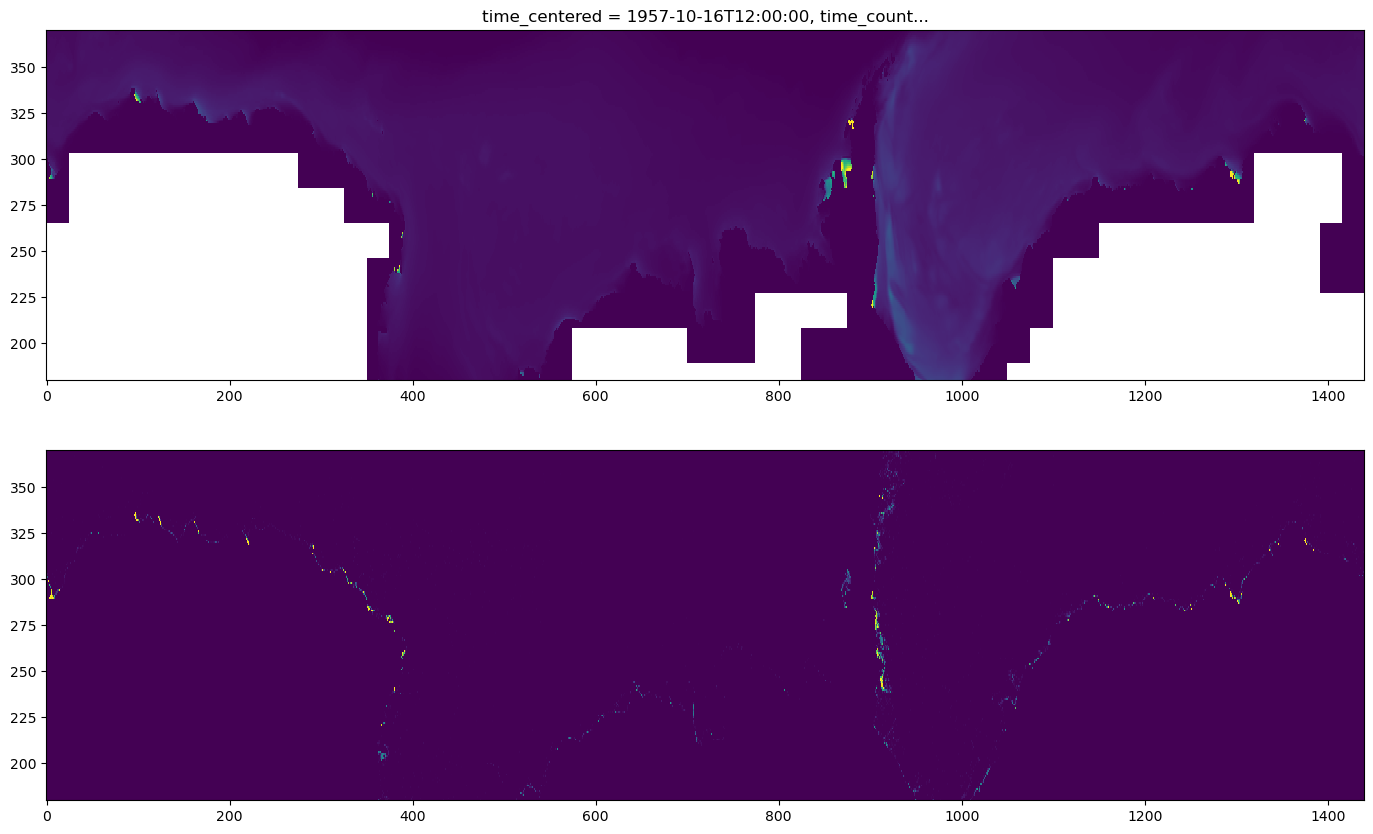

In [11]:
Tvar=cesm2T.sosst.isel(time_counter=0).rename({'x_grid_T':'x','y_grid_T':'y'})
fig, ax = plt.subplots(2,1, figsize=(17,10))
cesm2ni0.sithic.isel(time_counter=9).plot(ylim=(180,370), vmin=0, vmax=40, ax=ax[0], add_colorbar=False)
cesm2icb.virtual_area.plot(vmin=0, vmax=1e8, ax=ax[1], ylim=(180,370), add_colorbar=False)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

convert the iceberg melt diag in m/y and see how much it is compare to your sea ice growth rate.

In [10]:
# cesm2ns0 # berg_melt

In [11]:
# cesm2ni0 # vfxice
# tendencies: dmithd, dmidyn, dmiopw, dmibog, dmisni
# kg/m2/s --> m/year = kg/m2/s * s/year / (kg/m3)

In [6]:
# open full time series:
fulli0 = xr.open_mfdataset(glob.glob(f'{cesm2_1920}*icemod*'))
fulls0 = xr.open_mfdataset(glob.glob(f'{cesm2_1920}*SBC*'))

In [29]:
# not dmiopw or dmibog
# maybe dmisni
sea_ice_tendency = fulli0.dmithd + fulli0.dmidyn + fulli0.dmiopw + fulli0.dmibog + fulli0.dmisni

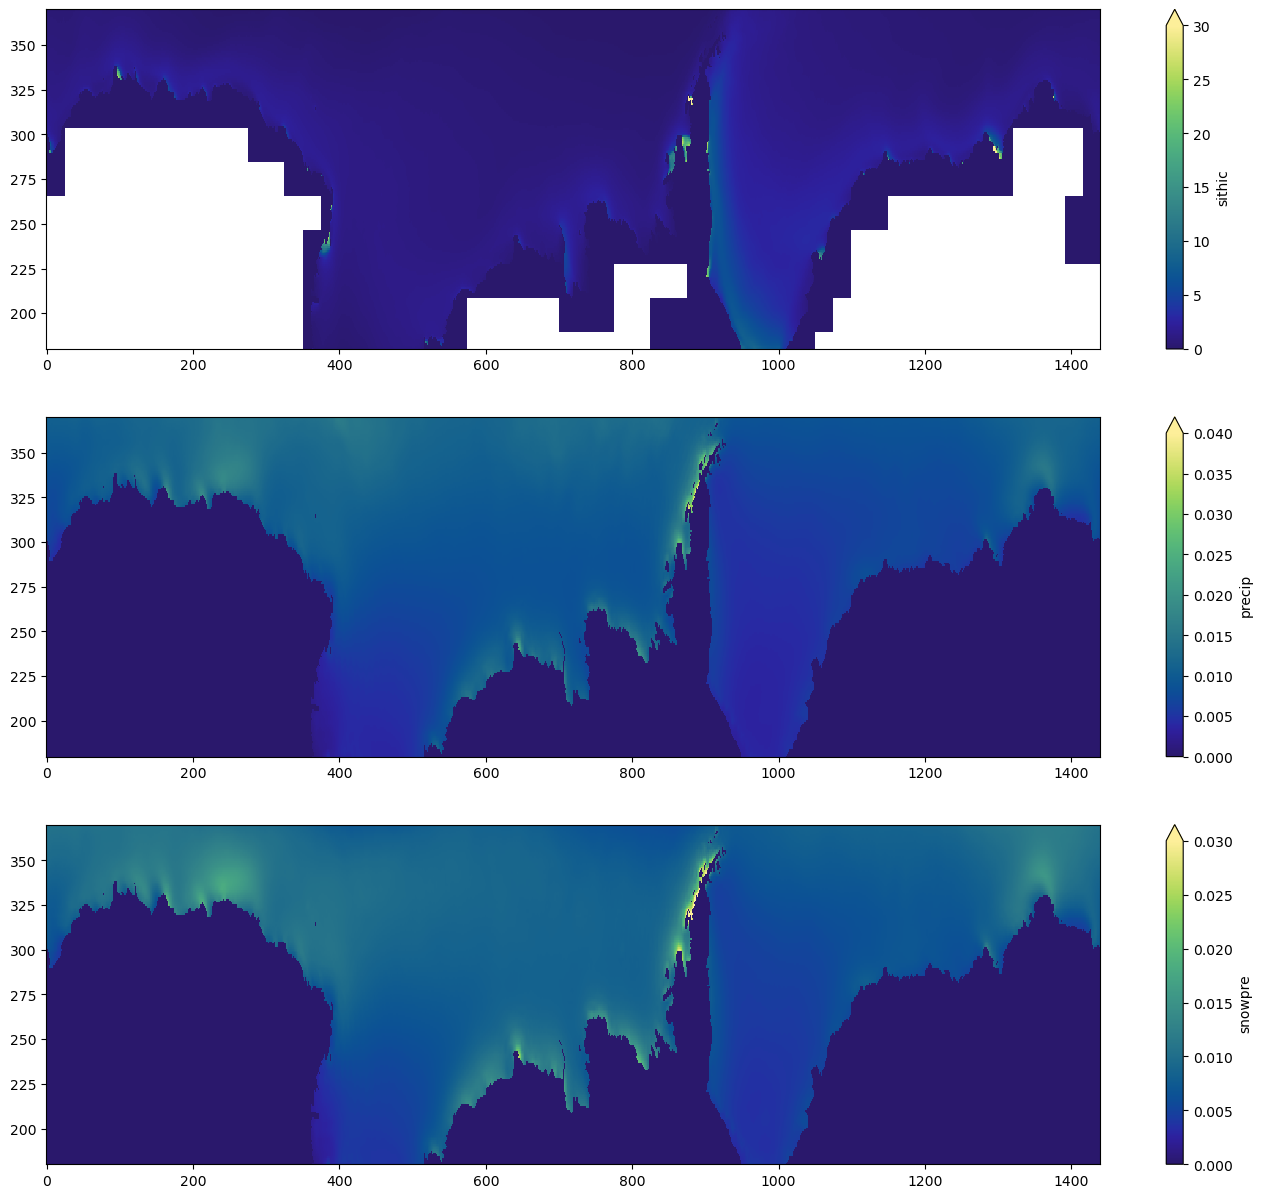

In [7]:
# doesn't seem to be: dmithd, dmidyn, dmiopw, dmibog, 
fig, ax = plt.subplots(3,1, figsize=(17,15))
fulli0.sithic.mean(dim='time_counter').plot(ax=ax[0], vmin=0, vmax=30, cmap=cmocean.cm.haline)
fulls0.precip.sum(dim='time_counter').plot(ax=ax[1], vmin=0, vmax=0.04, cmap=cmocean.cm.haline)
fulls0.snowpre.sum(dim='time_counter').plot(ax=ax[2], vmin=0, vmax=0.03, cmap=cmocean.cm.haline)
# fulli0.dmithd.sum(dim='time_counter').plot(ax=ax[1], ylim=(180,370))
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')
    axis.set_ylim(180,370)

In [33]:
cesm2ns0 # precip, snowpre

<xarray.Dataset> Size: 72GB
Dimensions:               (time_counter: 432, y: 453, x: 1440, nvertex: 4,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 3MB dask.array<chunksize=(453, 1440), meta=np.ndarray>
    nav_lon               (y, x) float32 3MB dask.array<chunksize=(453, 1440), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 3kB 1920-01-16T12:00:...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/60)
    bounds_nav_lon        (time_counter, y, x, nvertex) float32 5GB dask.array<chunksize=(12, 453, 1440, 4), meta=np.ndarray>
    bounds_nav_lat        (time_counter, y, x, nvertex) float32 5GB dask.array<chunksize=(12, 453, 1440, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 1GB dask.array<chunksize=(12, 453, 1440), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 7kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 7kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    dmithd                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    ...                    ...
    vfxsnw                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxbog                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxbom                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxlam                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxopw                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxdyn                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
Attributes:
    name:         eANT025.L121_1m_19200101_19201231_icemod
    description:  ice variables
    title:        ice variables
    Conventions:  CF-1.6
    timeStamp:    2025-May-30 08:12:32 GMT
    uuid:         f462ee96-8687-452e-8b41-c5a4208b5500

snow ice formation of order mean 1e-5 and clearly an issue in that specific area. BUT, if I sum the sea ice tendency, I don't get the overall thickness distribution I'd expect, so I'm a bit confused about that.

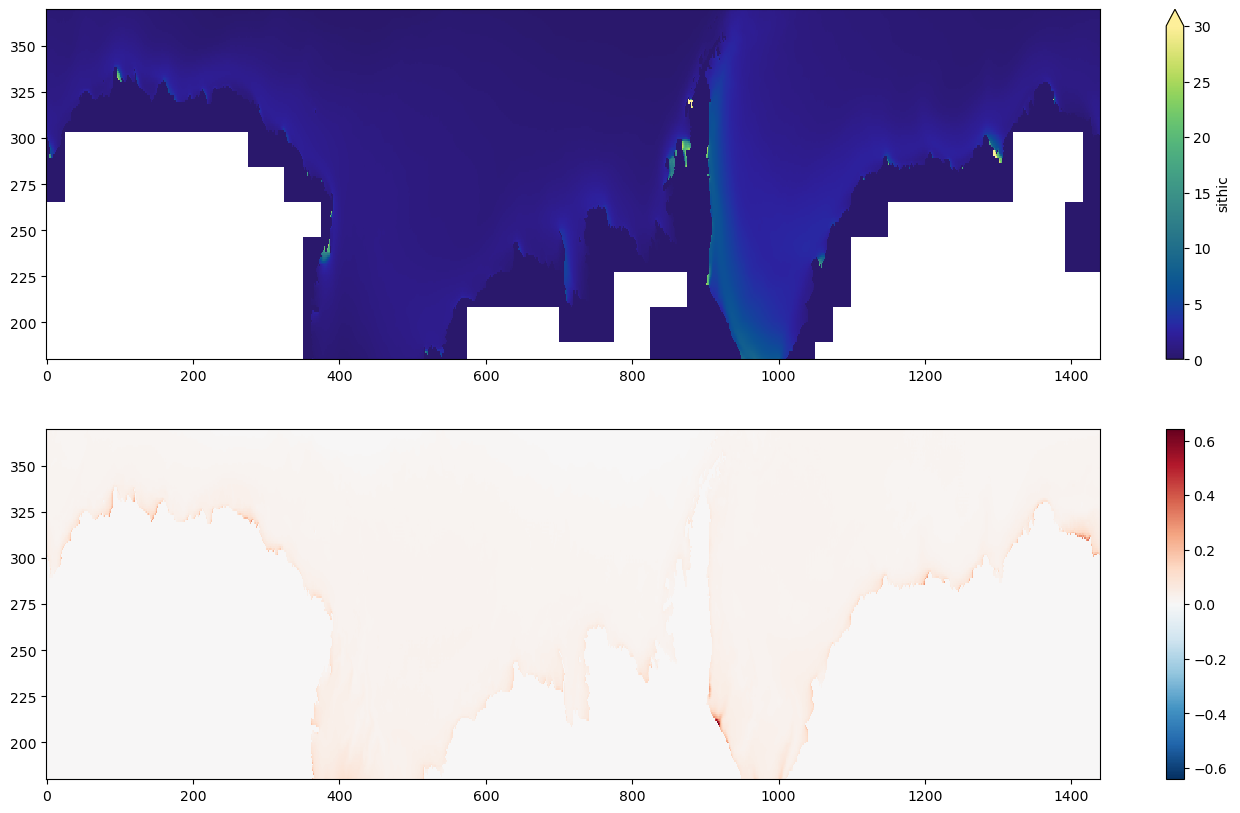

In [31]:
# doesn't seem to be: dmithd, dmidyn, dmiopw, dmibog, 
fig, ax = plt.subplots(2,1, figsize=(17,10))
fulli0.sithic.mean(dim='time_counter').plot(ax=ax[0], ylim=(180,370), vmin=0, vmax=30, cmap=cmocean.cm.haline)
sea_ice_tendency.sum(dim='time_counter').plot(ax=ax[1], ylim=(180,370))
# fulli0.dmithd.sum(dim='time_counter').plot(ax=ax[1], ylim=(180,370))
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

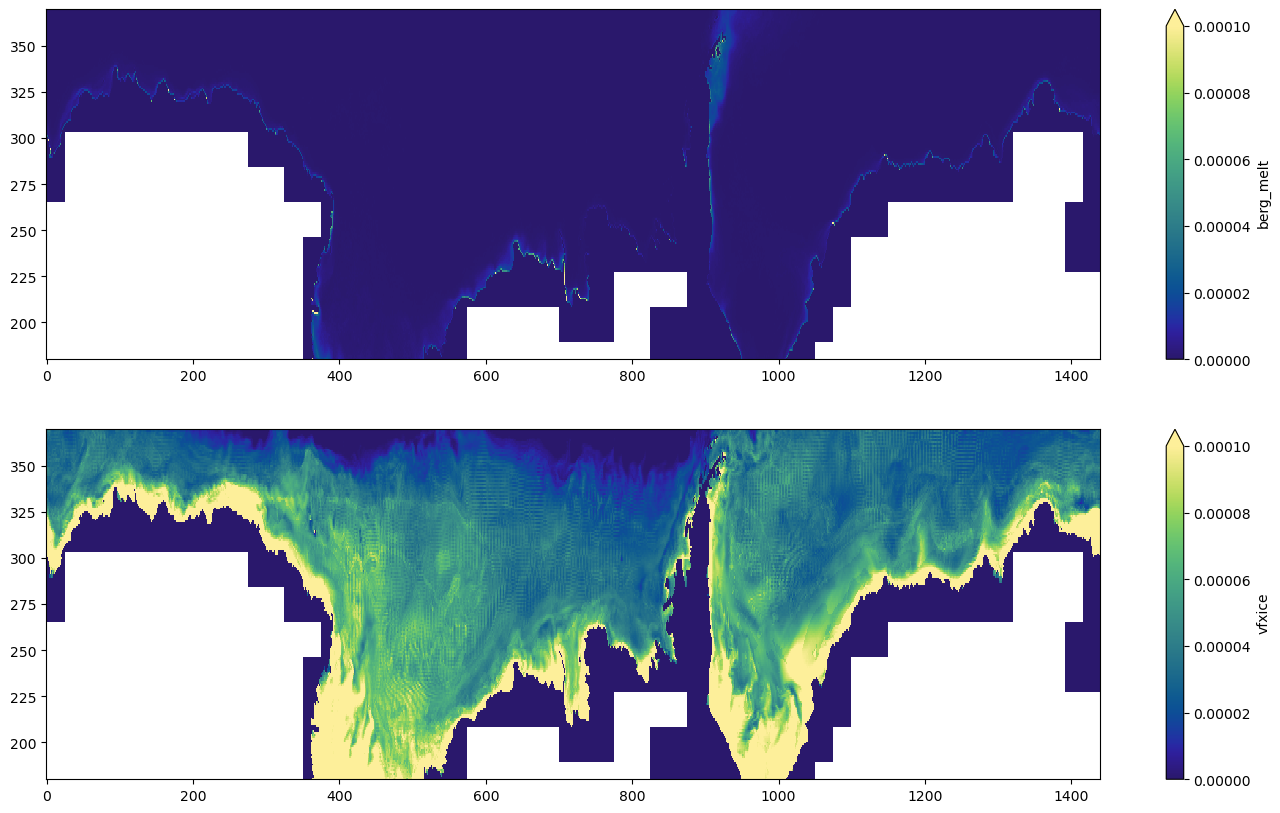

In [13]:
fig, ax = plt.subplots(2,1, figsize=(17,10))
fulls0.berg_melt.mean(dim='time_counter').plot(ylim=(180,370), ax=ax[0], vmin=0, vmax=1e-4, cmap=cmocean.cm.haline)
(-1*fulli0.vfxice.where(cesm2ni0.vfxice <=0)).mean(dim='time_counter').plot(ax=ax[1], ylim=(180,370), vmin=0, vmax=1e-4, cmap=cmocean.cm.haline)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

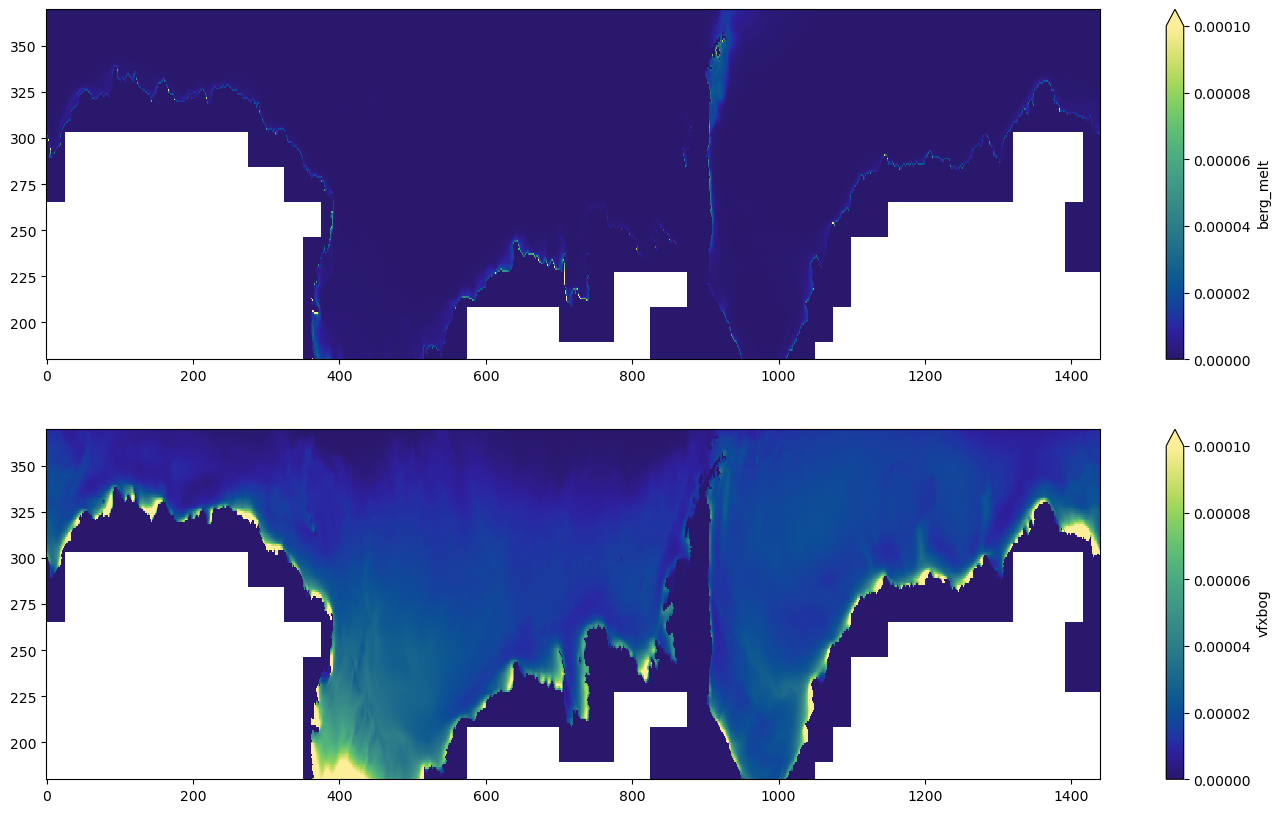

In [10]:
fig, ax = plt.subplots(2,1, figsize=(17,10))
fulls0.berg_melt.mean(dim='time_counter').plot(ylim=(180,370), ax=ax[0], vmin=0, vmax=1e-4, cmap=cmocean.cm.haline)
(-1*fulli0.vfxbog).mean(dim='time_counter').plot(ax=ax[1], ylim=(180,370), vmin=0, vmax=1e-4, cmap=cmocean.cm.haline)
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')

### Look at sea ice fields

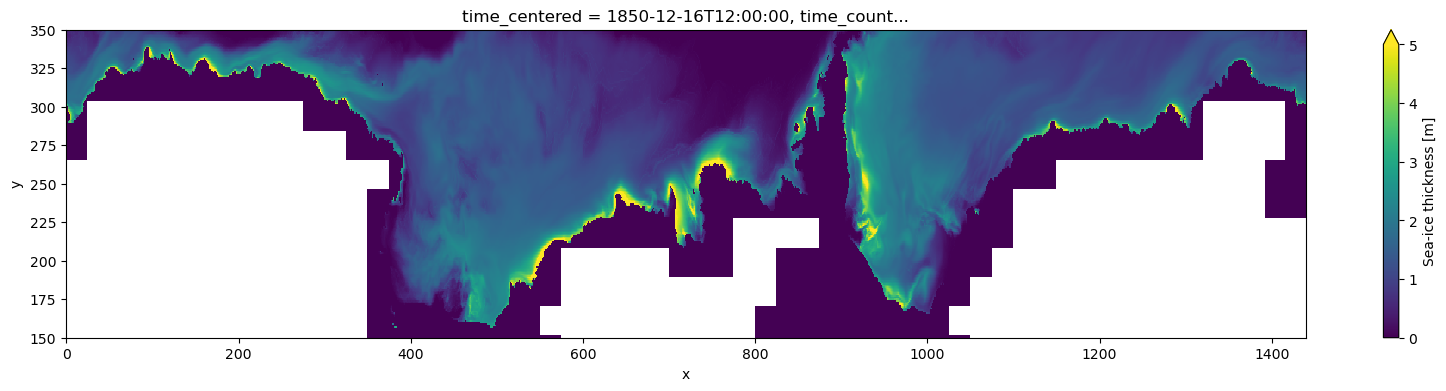

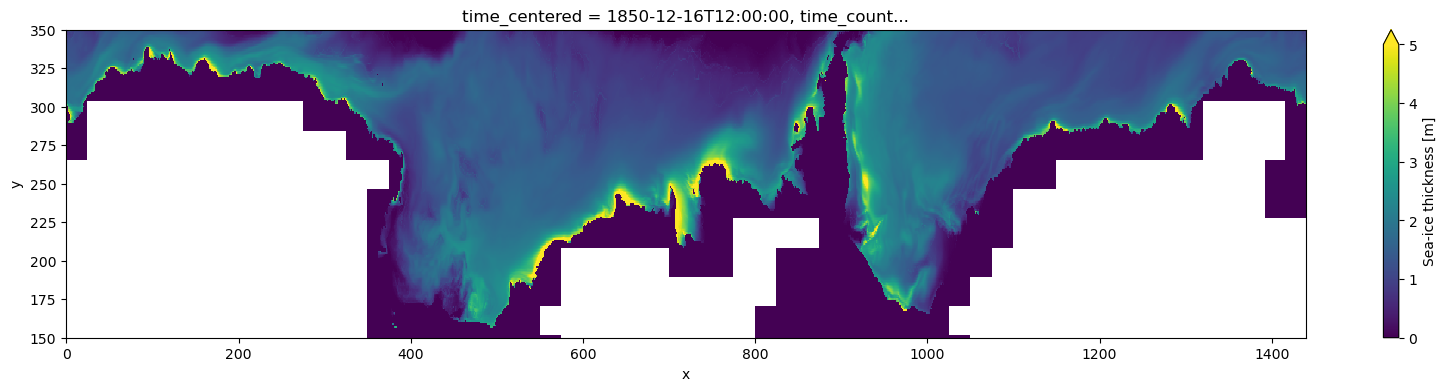

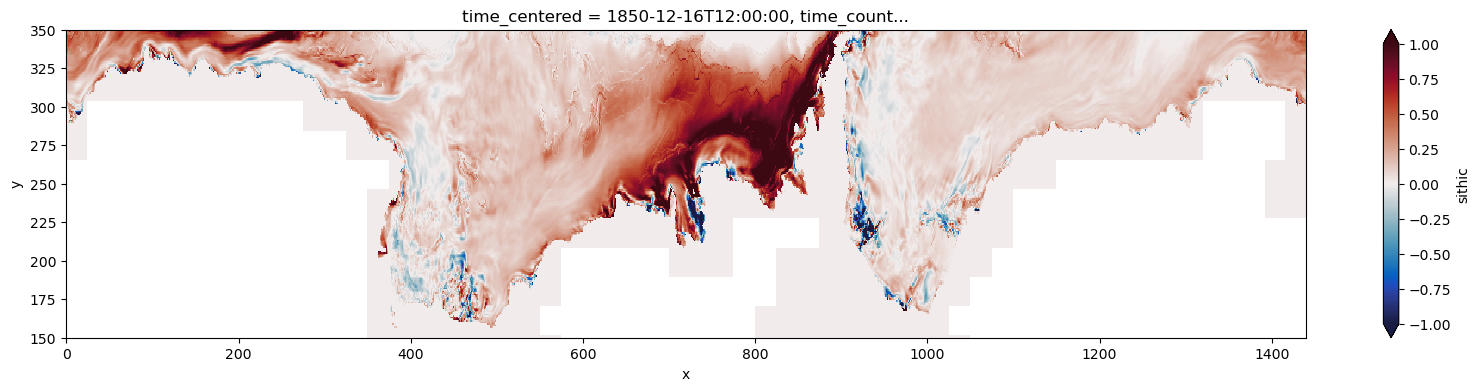

In [16]:
ts=11
lresi0.sithic.isel(time_counter=ts).plot(figsize=(20,4), ylim=(150,350), vmin=0, vmax=5)
hresi0.sithic.isel(time_counter=ts).plot(figsize=(20,4), ylim=(150,350), vmin=0, vmax=5)
(hresi0.sithic-lresi0.sithic).isel(time_counter=ts).plot(figsize=(20,4), ylim=(150,350), vmin=-1, vmax=1, cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'ERA5 atmospheric forcing')

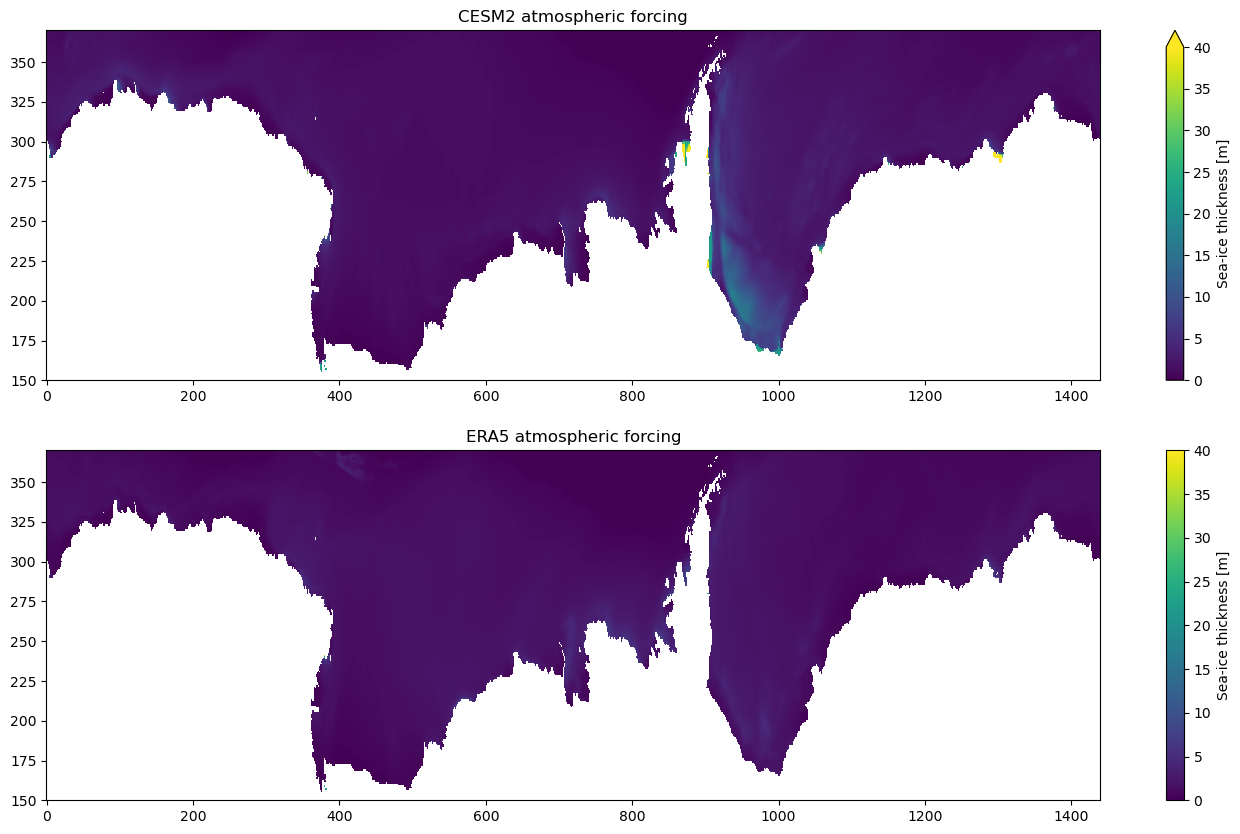

In [31]:
Tvar=cesm2T.sosst.isel(time_counter=0).rename({'x_grid_T':'x','y_grid_T':'y'})
fig, ax = plt.subplots(2,1, figsize=(17,10))
cesm2i0.sithic.isel(time_counter=9).where(Tvar!=0).plot(ylim=(150,370), vmin=0, vmax=40, ax=ax[0])
era5i.sithic.isel(time_counter=9).where(Tvar!=0).plot(ylim=(150,370), vmin=0, vmax=40, ax=ax[1])
for axis in ax.ravel():
    axis.set_xlabel('')
    axis.set_ylabel('')
ax[0].set_title('CESM2 atmospheric forcing')
ax[1].set_title('ERA5 atmospheric forcing')

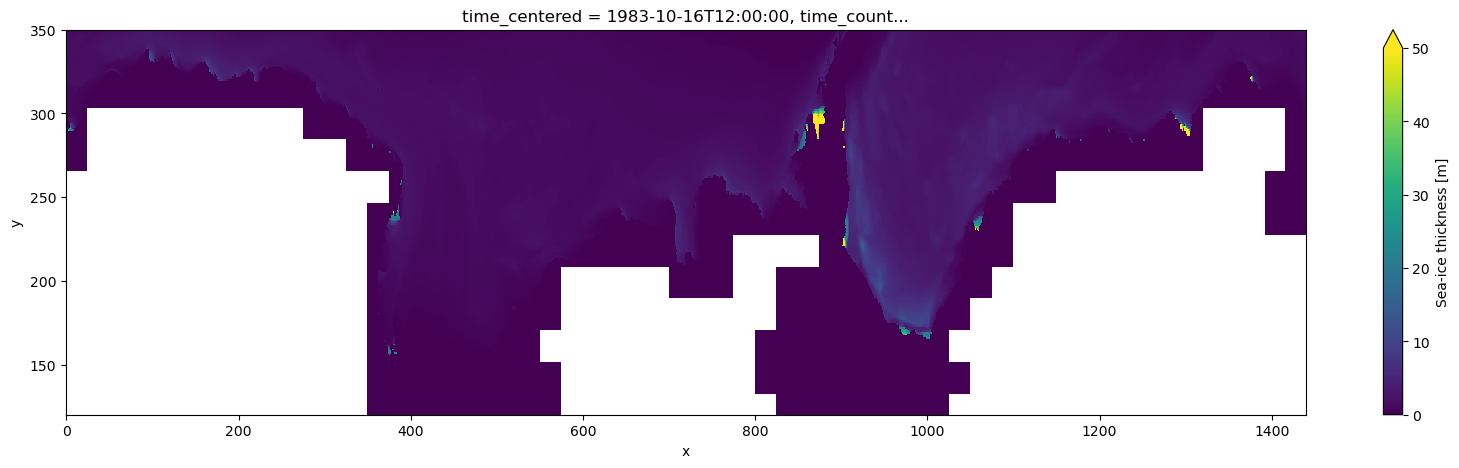

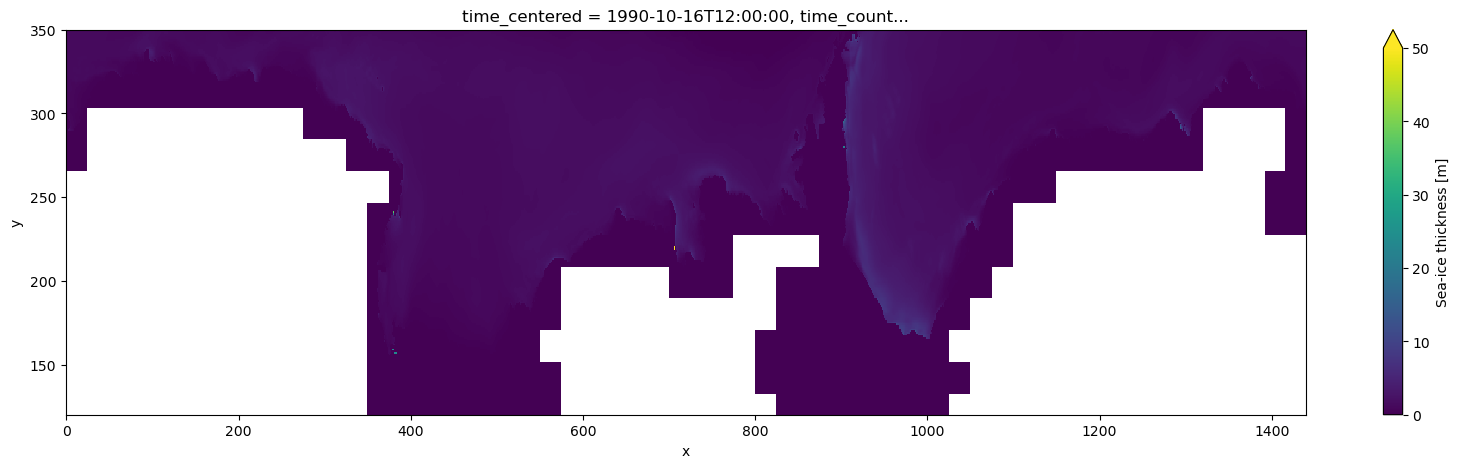

In [12]:
cesm2i0.sithic.isel(time_counter=9).plot(figsize=(20,5), ylim=(120,350), vmin=0, vmax=50)
era5i.sithic.isel(time_counter=9).plot(figsize=(20,5), ylim=(120,350), vmin=0, vmax=50)

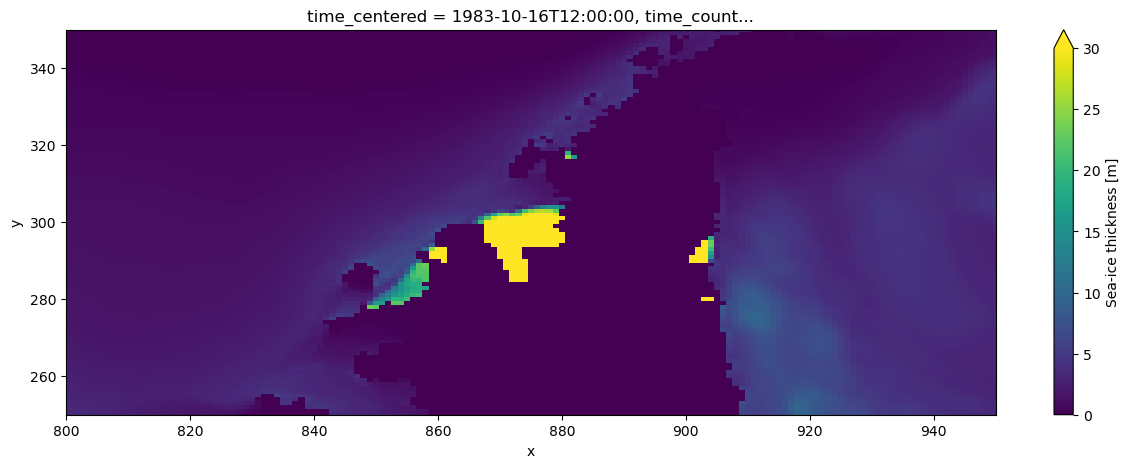

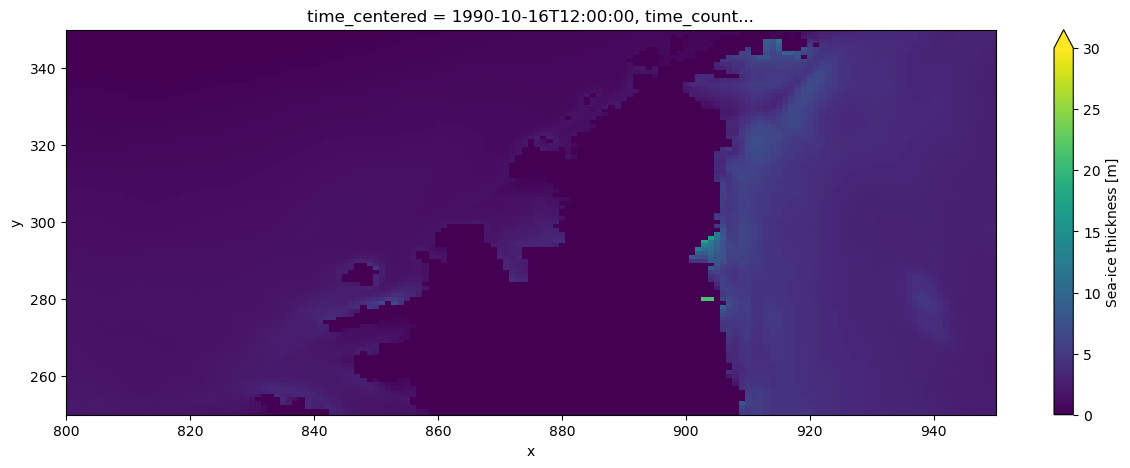

In [15]:
cesm2i0.sithic.isel(time_counter=9).plot(figsize=(15,5), xlim=(800,950), ylim=(250,350), vmin=0, vmax=30)
era5i.sithic.isel(time_counter=9).plot(figsize=(15,5), xlim=(800,950), ylim=(250,350), vmin=0, vmax=30)

Text(0.5, 1.0, 'ERA5 radiation otherwise CESM2')

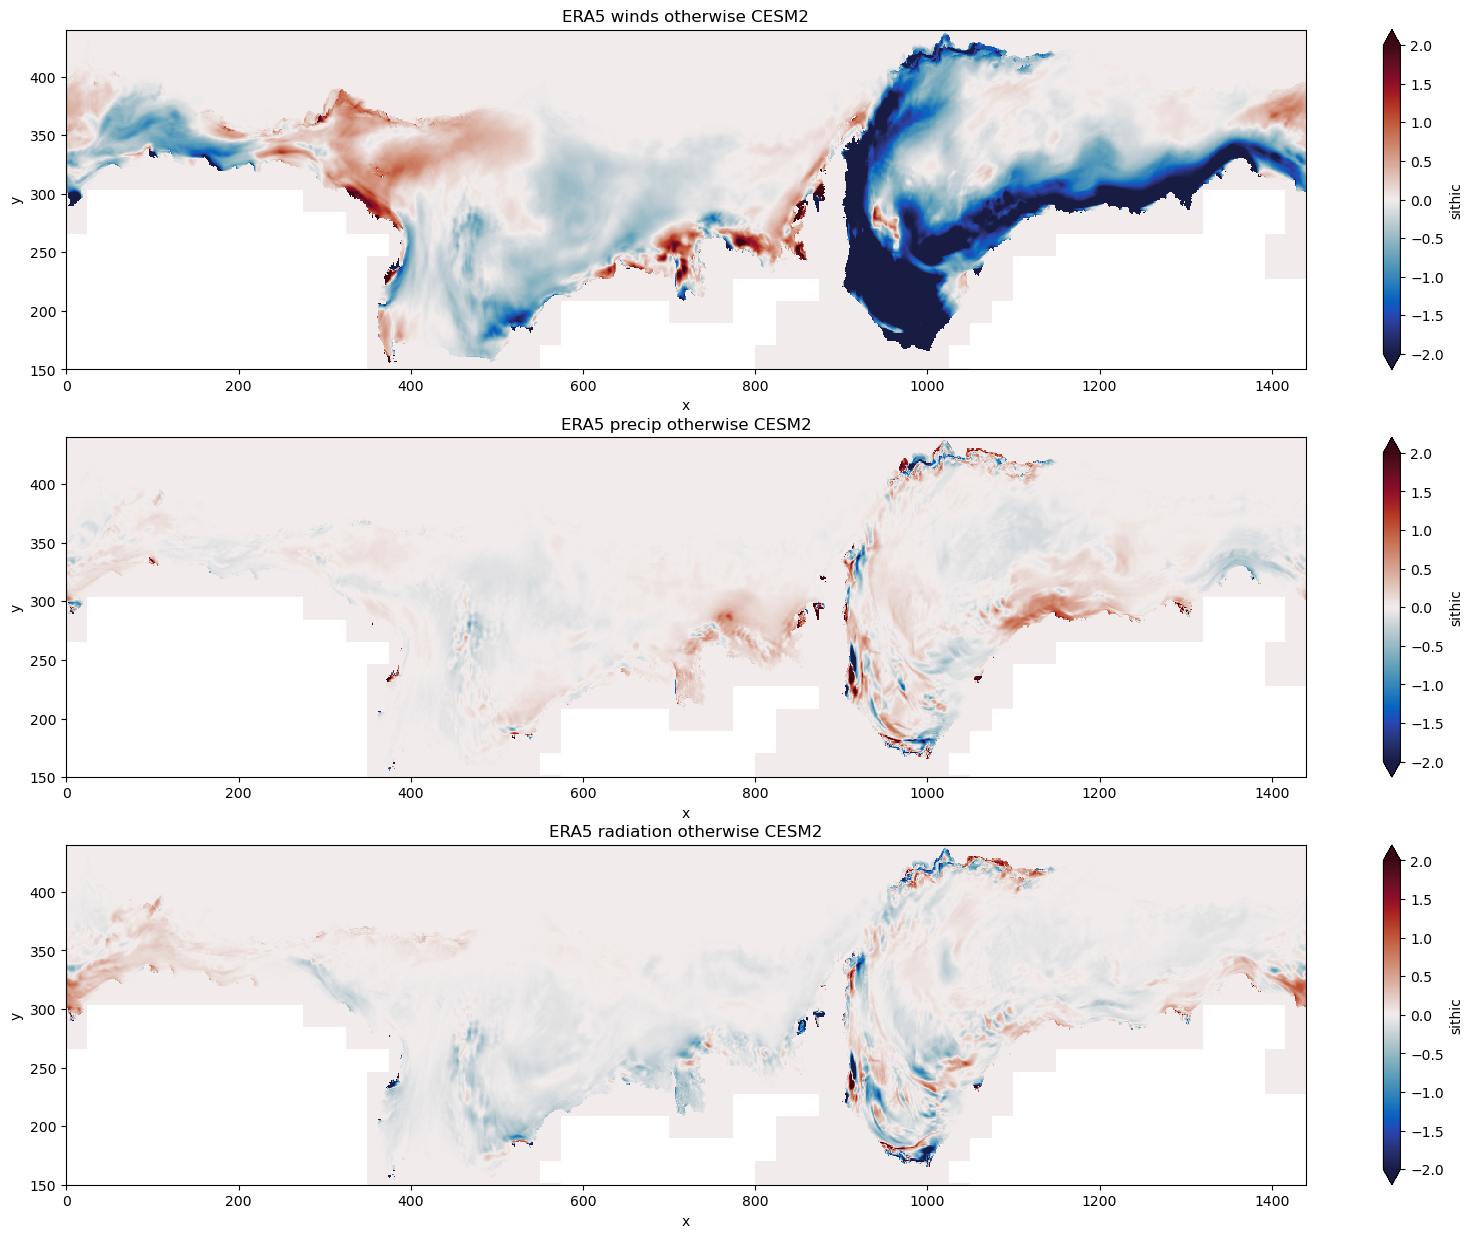

In [37]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
(cesm2i1.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[0], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
(cesm2i3.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[1], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
(cesm2i4.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[2], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
ax[0].set_title('ERA5 winds otherwise CESM2')
ax[1].set_title('ERA5 precip otherwise CESM2')
ax[2].set_title('ERA5 radiation otherwise CESM2')

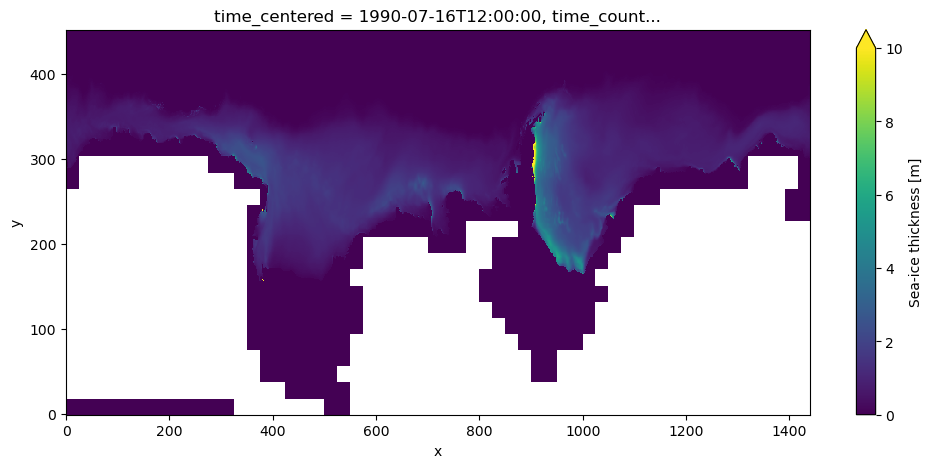

In [89]:
era5i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)

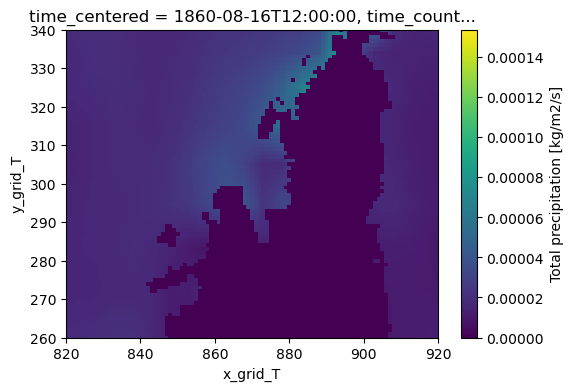

In [66]:
cesm2S['precip'].isel(time_counter=7).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))
# cesm2S['sosss'].isel(time_counter=7).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=32, vmax=35)

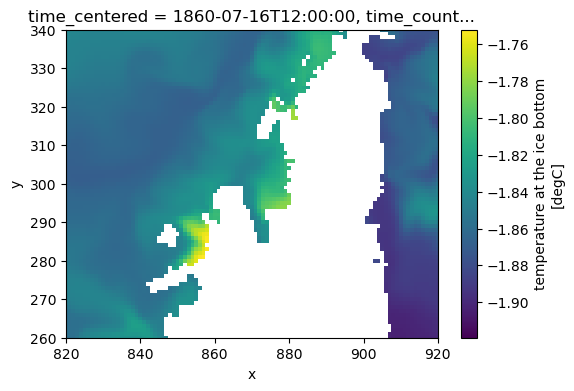

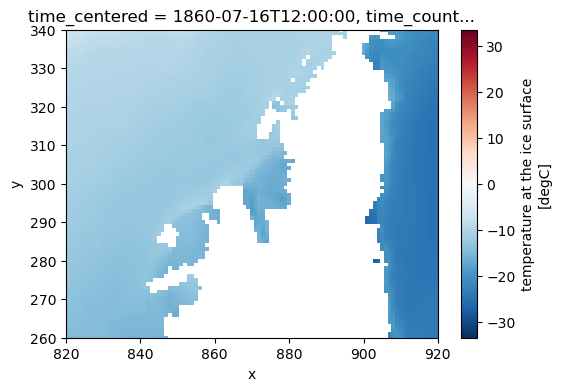

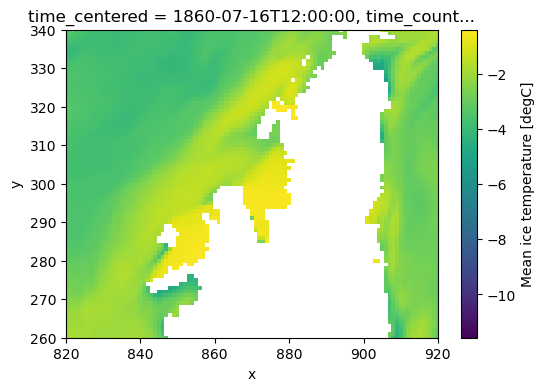

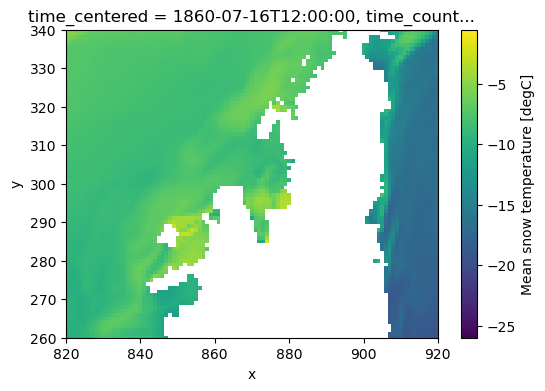

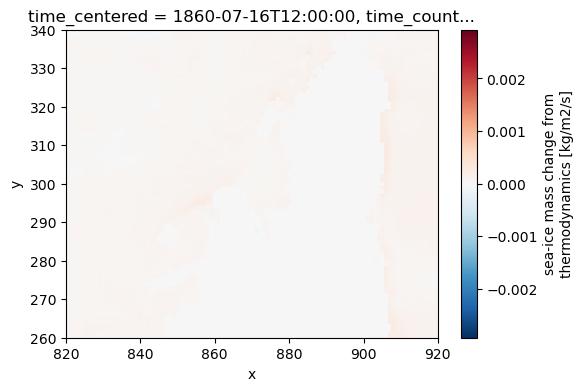

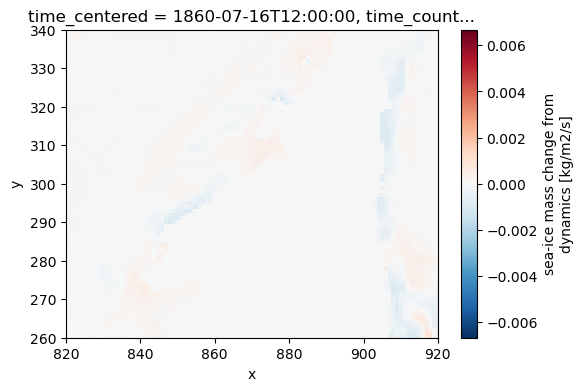

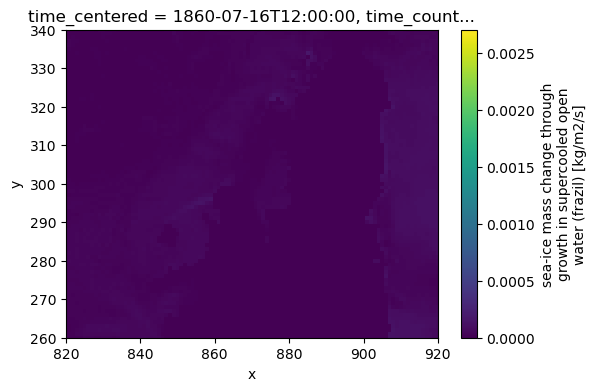

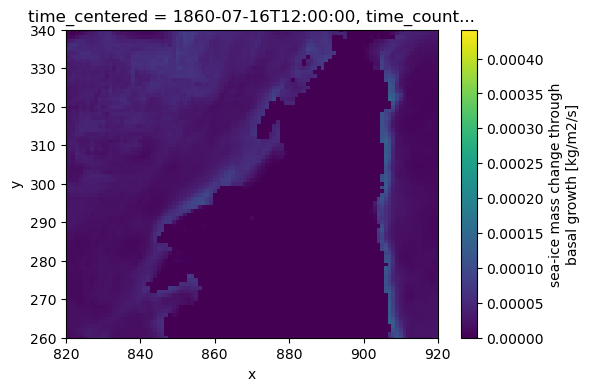

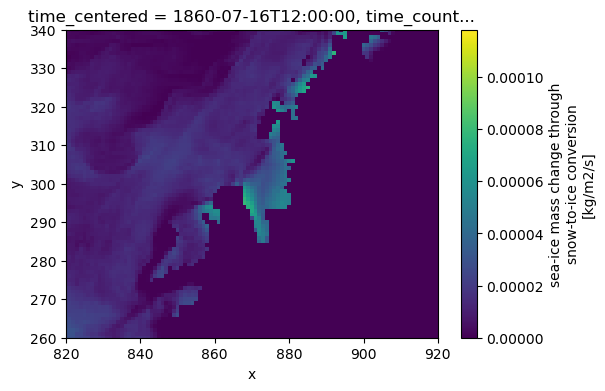

In [42]:
# for var in list(cesm2i.keys())[5:]:
#     cesm2i[var].isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))

for var in ['sitbot', 'sittop', 'sitemp', 'sntemp', 'dmithd', 'dmidyn', 'dmiopw', 'dmibog', 'dmisni']:
    cesm2i[var].isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))
# high snow volume and high sea ice thickness low sea ice salinity, very high compressive sea ice strength, 

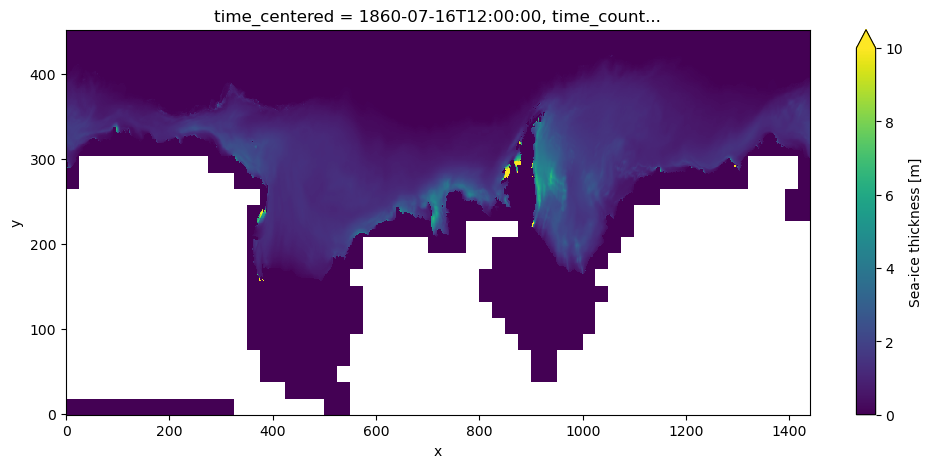

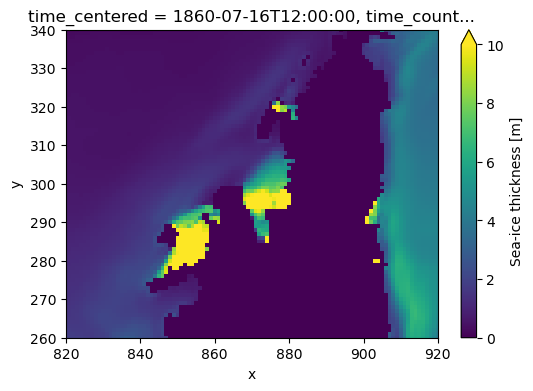

In [53]:
cesm2i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
cesm2i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

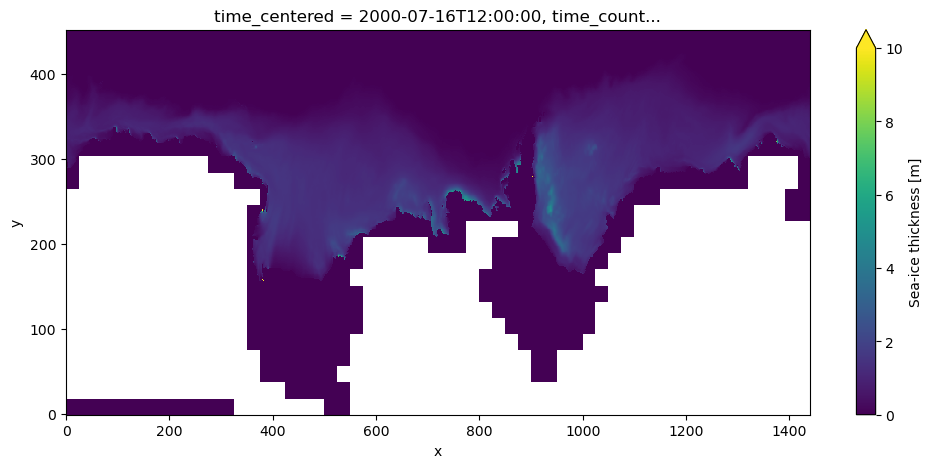

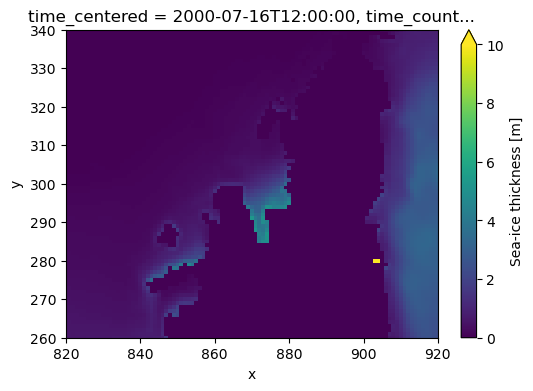

In [54]:
era5i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
era5i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

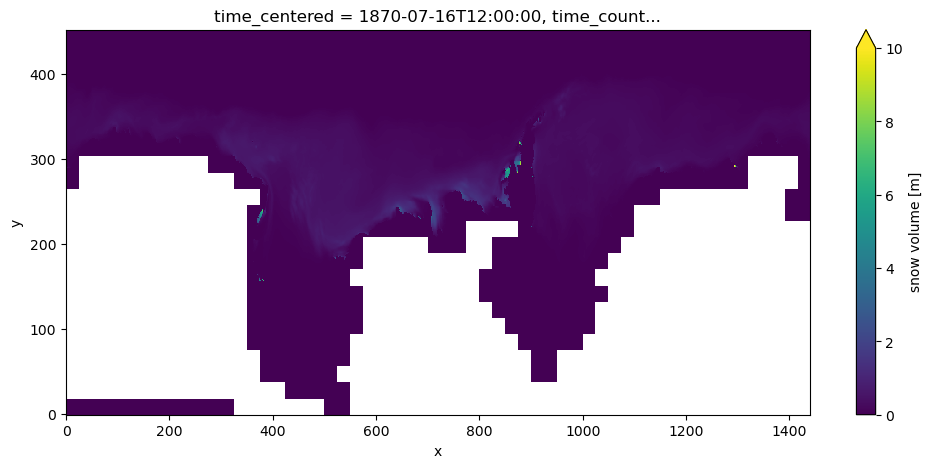

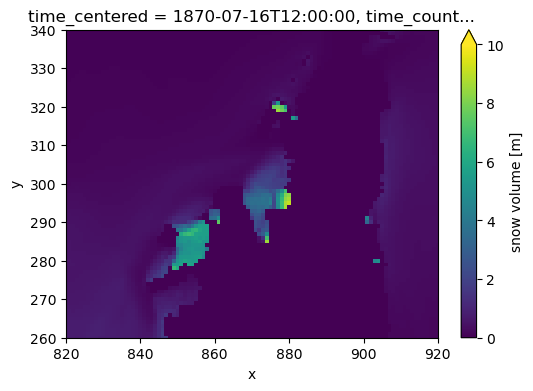

In [14]:
cesm2i.snvolu.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
cesm2i.snvolu.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

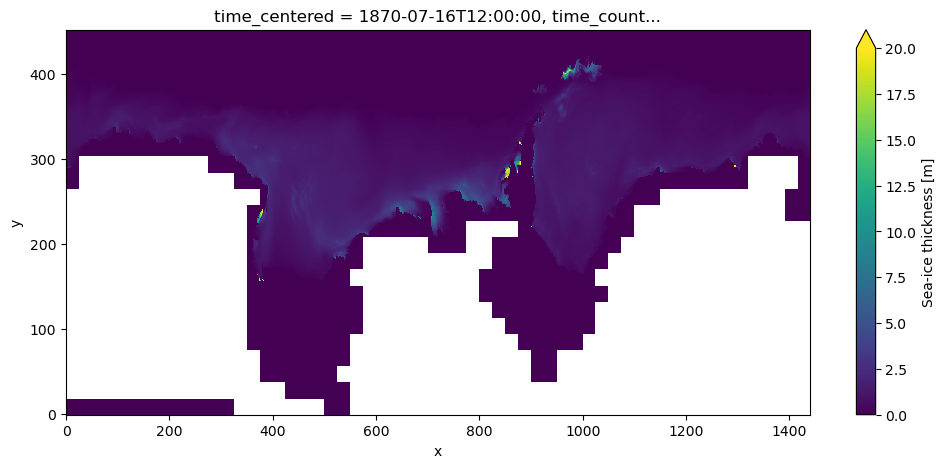

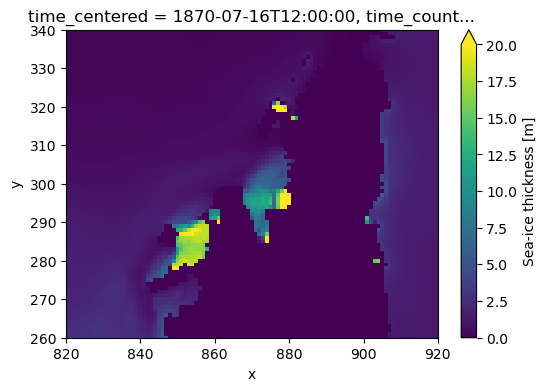

In [15]:
cesm2i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=20)
cesm2i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=20)

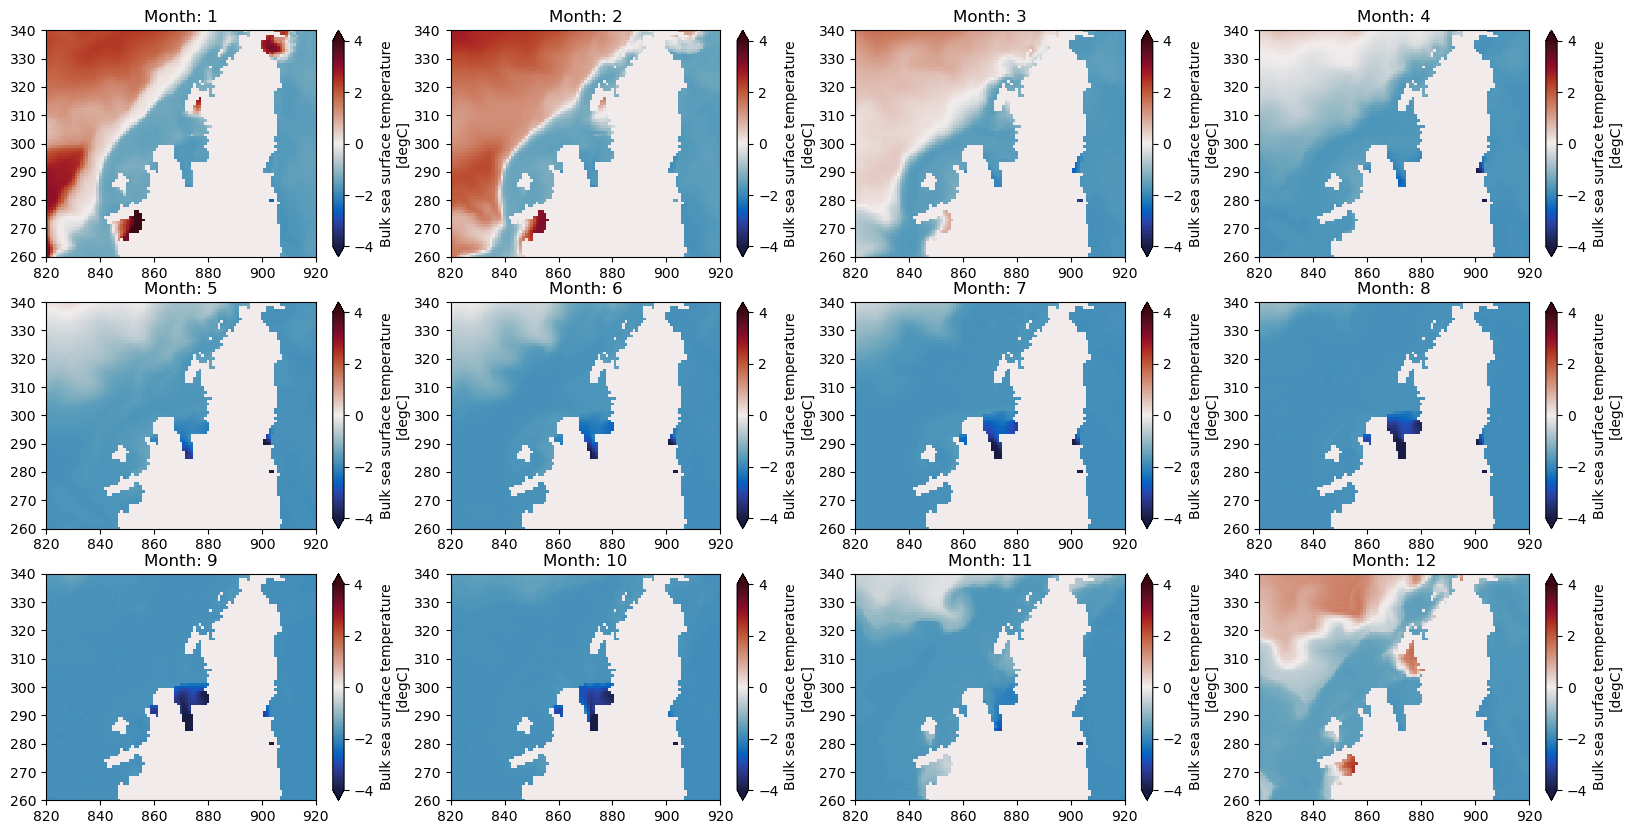

In [11]:
fig, ax = plt.subplots(3,4, figsize=(20,10))

for a, axis in enumerate(ax.ravel()):
    cesm2T.sosst.isel(time_counter=a).plot(ax=axis, vmin=-4, vmax=4, cmap=cmocean.cm.balance, ylim=(260,340), xlim=(820,920))
    axis.set_title(f'Month: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');[4]